# Lending Club Case Study

## Goal/Objective:
* The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.<br>
* To identify the risky loan applicants, which helps in cutting down the amount of credit loss by performing Exploratory Data Analysis

## Data loading.....

In [1]:
'''Importing required packages'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_columns', None)

In [2]:
'''Reading loan datafile'''
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
print(loan.shape)

(39717, 111)


## Data Understanding:

**Overview:**

The dataset presented to us is in csv format. There are a total of 111 attributes in the dataset and the attributes can be divided into continuous and categorical.Some tasks that needs to be performed on the data are removal of unnecessary columns, conversion of numeric data types from object to float and int, removing special symbols from the data, removing null valued columns, removing outliers from our data and imputing missing values from our data.

The attributes provided in the data file are basically of 2 types **Consumer Attributes** and **Loan Attributes**.


### Visualize data description of the variables to move further

In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning:

**By glancing at data, we can see that few variables cannot contribute to our analysis or irrelevant for us. So can safely remove them..**

In [5]:
rm_var = ['id', 'member_id', 'title', 'desc','url','zip_code','addr_state', 'emp_title']
loan.drop(rm_var, axis=1, inplace=True)
loan.shape
pd.set_option('display.max_columns', None)

**The variable "loan_status" holds information as  *Fully paid*, *Current* and *Charged off* status of the consumer. Here for now we only need to focus on two states of the loan i.e-  *Fully paid*,and *Charged off* 
Remove the rows from the data which holds the data of 'Current' loan status..**

In [6]:
loan=loan[loan['loan_status'] != 'Current']
loan.shape

(38577, 103)

In [7]:
print(round(1140/39717*100,2))
print("Here we observed 2.8% data contains information about the current consumers")

2.87
Here we observed 2.8% data contains information about the current consumers


### Remove columns having null values greater than 60%

In [8]:
print("Following columns having null values as shown below (in %)...")
more_nas=round((loan.isnull().sum()/len(loan))*100, 2)
temp=more_nas[more_nas > 0.00].sort_values(ascending = False)
temp.nlargest(60)

Following columns having null values as shown below (in %)...


bc_util                           100.00
bc_open_to_buy                    100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_rev_tl_op             100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_24m                100.00
num_tl_op_past_12m                100.00
pct_tl_nvr_dlq  

In [9]:
print("Columns left after removing the null valued columns...")
loan=loan[loan.columns[more_nas < 60.00]]
print(loan.shape)

Columns left after removing the null valued columns...
(38577, 46)


In [10]:
more_nas=round((loan.isnull().sum()/len(loan))*100, 2)
temp=more_nas[more_nas > 0.00].sort_values(ascending = False)
temp.nlargest(60)

emp_length                    2.68
pub_rec_bankruptcies          1.81
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.15
chargeoff_within_12_mths      0.15
revol_util                    0.13
tax_liens                     0.10
last_credit_pull_d            0.01
dtype: float64

### Missing values Imputation
* In the above table, we can see few variables having missing values, so we will impute them with some considered value
* Column emp_length is having 2.68% missing values so we will fill na with the mode value

In [11]:
print("Mode : " + loan.emp_length.mode()[0])
loan.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

The column has mode value as 10+ years we can fill na with the mode value itself

In [12]:
_=loan['emp_length'].fillna(loan['emp_length'].mode()[0], inplace = True)
loan['emp_length'].isnull().sum()

0

### Fetch the columns having single value and remove them, since this single valued columns doesn't impact our analysis..

In [13]:
drop_cols=loan.columns[loan.nunique() <=1].to_list()
drop_cols

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [14]:
loan.drop(drop_cols,axis= 1, inplace=True)

In [15]:
print("Columns left after removing single valued columns...")
print(loan.shape)

Columns left after removing single valued columns...
(38577, 35)


In [16]:
loan.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

### Cleaning Data by removing special characters or symbols from the variables

In [17]:
loan['int_rate'] = loan['int_rate'].replace('%','', regex=True).astype('float')

In [18]:
loan.emp_length = loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
loan.emp_length

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38577, dtype: object

In [19]:
loan.revol_util = loan.revol_util.str.replace('%', '').astype('float')

### Derived columns
* Split column "issue_d" into issue_month and issue_yr columns
* Derive new column from "term" specifying number of years instead of months

In [20]:
loan['term_yrs'] = loan['term'].str.extract('(\d+)').astype('int')
loan['term_yrs'] = (loan['term_yrs']/12).astype('str')

temp_df = loan['issue_d'].str.split('-', expand=True)
loan['issue_month'] = temp_df[0]
loan['issue_yr'] = temp_df[1].astype('int')
loan['issue_yr'] = (loan['issue_yr']+2000).astype('str')

### Outlier Treatment
* With the help of boxplots let us visualize in order to know whether outliers are present in a particular variable or not

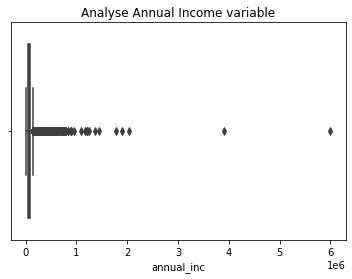

In [21]:
sns.boxplot(loan['annual_inc'])
plt.title("Analyse Annual Income variable")
plt.show()

**Insight**
* With the plot, we can see the outliers are present in the annual_inc variable.
* Now we will treat the outliers by finding in which quartile they exists.

In [22]:
quartile_data = np.quantile(loan['annual_inc'], [0.25,0.50,0.75,0.95, 0.99])
quartile_data

array([ 40000.,  58868.,  82000., 140004., 234144.])

In [23]:
loan=loan[loan['annual_inc'] <= quartile_data[3]]

Now we can see the clear distribution of values in the variable "annual_inc"

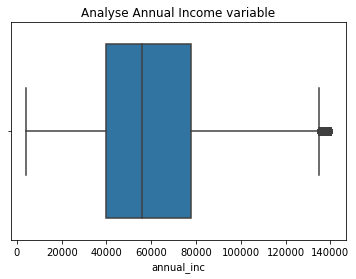

In [24]:
sns.boxplot(loan['annual_inc'])
plt.title("Analyse Annual Income variable")
plt.show()

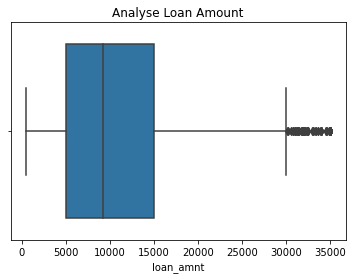

In [25]:
sns.boxplot(loan['loan_amnt'])
plt.title('Analyse Loan Amount')
plt.show()

In [26]:
loan['loan_amnt'].describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

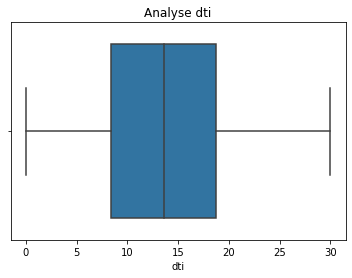

In [27]:
sns.boxplot(loan['dti'])
plt.title('Analyse dti')
plt.show()

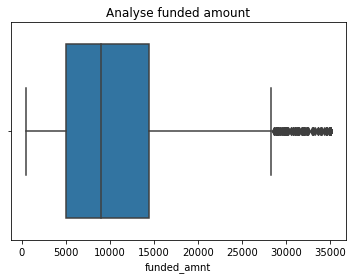

Since funded_amnt and funded_amnt_inv have high correlation and so they are similar type of variables so we are choosing funded_amnt for our analysis 


In [28]:
sns.boxplot(loan['funded_amnt'])
plt.title('Analyse funded amount')
plt.show()
print('Since funded_amnt and funded_amnt_inv have high correlation and so they are similar type of variables so we are choosing funded_amnt for our analysis ')


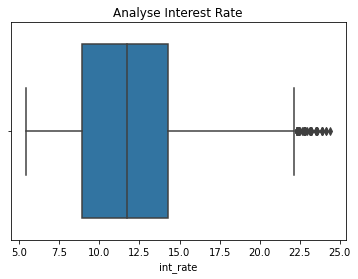

In [29]:
sns.boxplot(loan['int_rate'])
plt.title('Analyse Interest Rate')
plt.show()

**Conclusion from Outliers Analysis:** 

* We have observed the outliers from the continuous variables.
* Data does not contain more outliers and wherever found we have treated them.
* We can continue our analysis further by drawing the count of categoricle variables

### Distribution of data among "good" and "bad" consumers:
* good means the records having the loan_status as "fully_paid"
* bad means the records having loan_status as "charged_off" or Defaulters

### Viewing final data for analysis

In [30]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_yrs,issue_month,issue_yr
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,3.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,5.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,3.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,3.0,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,3.0,Dec,2011


###  Data Analysis

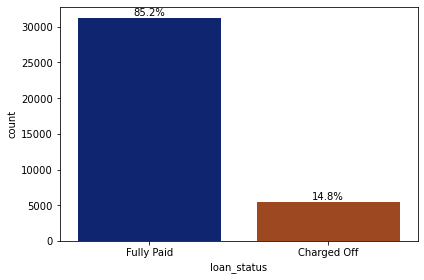

In [31]:
sns.set_palette("dark")

ax=sns.countplot(x = 'loan_status', data = loan)
total = len(loan)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### Univariate Analysis 

In [32]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

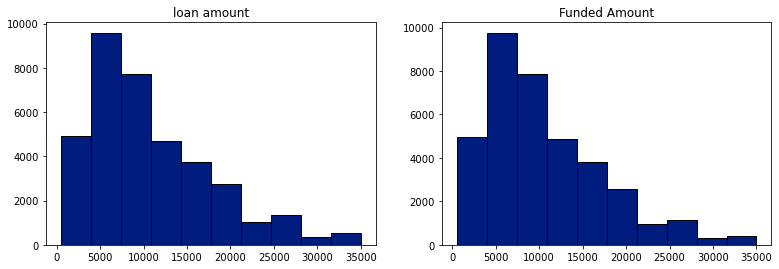

In [33]:

plt.figure(figsize=(13,9))
plt.subplot(221)
plt.hist(loan['loan_amnt'], edgecolor='black')
plt.title('loan amount')
plt.subplot(222)
plt.hist(loan['funded_amnt'], edgecolor='black')
plt.title("Funded Amount")
plt.show()


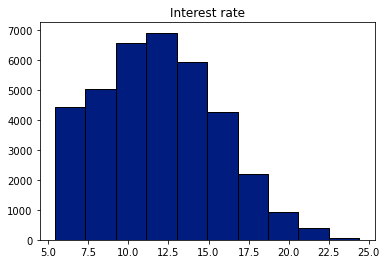

In [34]:
plt.hist(loan['int_rate'], 10,edgecolor='black')
plt.title('Interest rate')
plt.show()

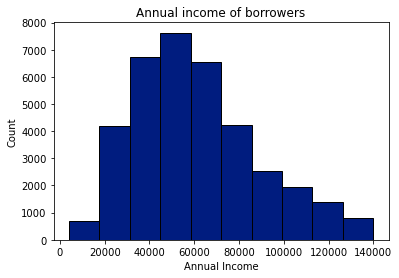

In [35]:
fig, ax = plt.subplots()
ax.hist(loan['annual_inc'], 10, edgecolor='black')
ax.set_title("Annual income of borrowers")
ax.set_xlabel("Annual Income")
ax.set_ylabel("Count")
plt.show()

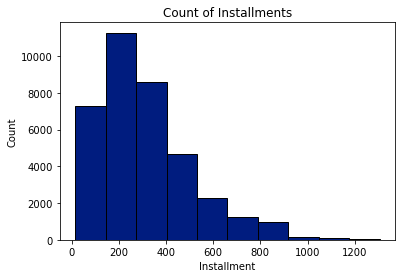

In [36]:
fig, ax = plt.subplots()
ax.hist(loan['installment'], 10, edgecolor='black')
ax.set_title("Count of Installments")
ax.set_xlabel("Installment")
ax.set_ylabel("Count")
plt.show()

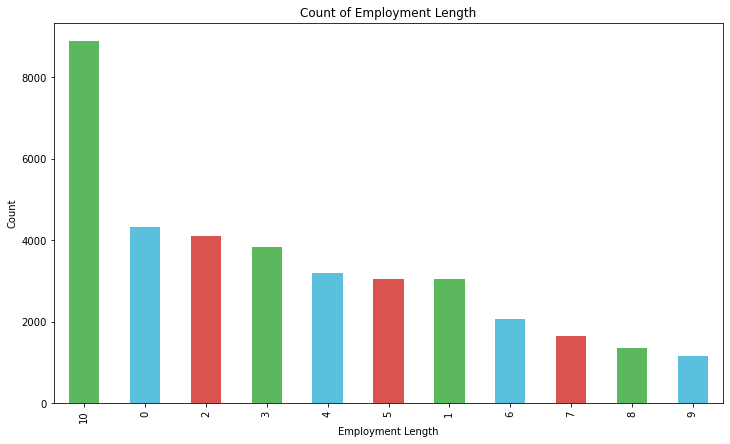

In [37]:
fig, ax = plt.subplots(figsize=(12,7))
loan['emp_length'].value_counts().plot(kind='bar', color = colors_list)
plt.title('Count of Employment Length')
ax.set_xlabel("Employment Length")
ax.set_ylabel("Count")
plt.show()

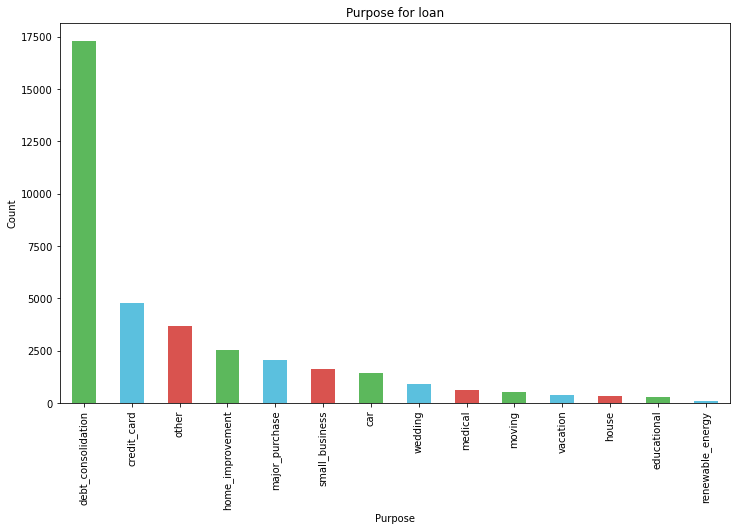

In [38]:
fig, ax = plt.subplots(figsize=(12,7))
loan['purpose'].value_counts().plot(kind='bar', color = colors_list)
plt.title('Purpose for loan')
ax.set_xlabel("Purpose")
ax.set_ylabel("Count")
plt.show()

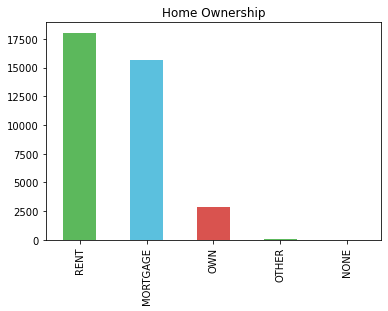

In [39]:
# fig, ax = plt.subplots(figsize=(10,7))
loan['home_ownership'].value_counts().plot(kind='bar', color = colors_list)
plt.title('Home Ownership')
ax.set_xlabel("home_ownership")
ax.set_ylabel("Count")
plt.show()

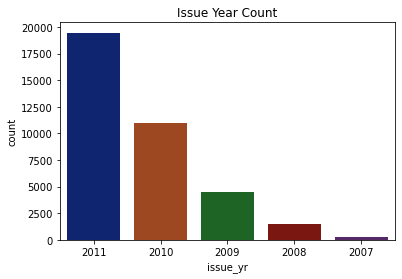

In [40]:
sns.countplot(loan['issue_yr'])
plt.title('Issue Year Count')
plt.show()

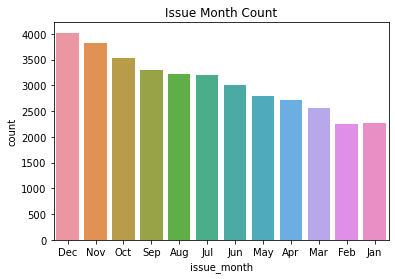

In [41]:
sns.countplot(loan['issue_month'])
plt.title('Issue Month Count')
plt.show()

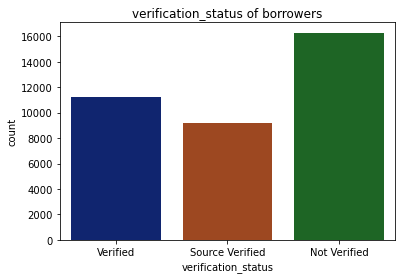

In [42]:
sns.countplot(loan['verification_status'])
plt.title('verification_status of borrowers')
plt.show()

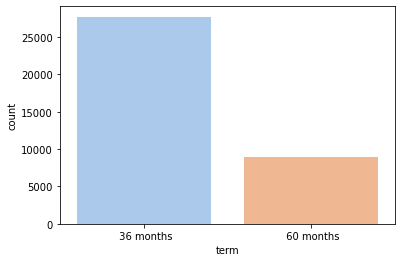

In [43]:
sns.countplot(x = 'term', data = loan, palette= 'pastel')
plt.show()

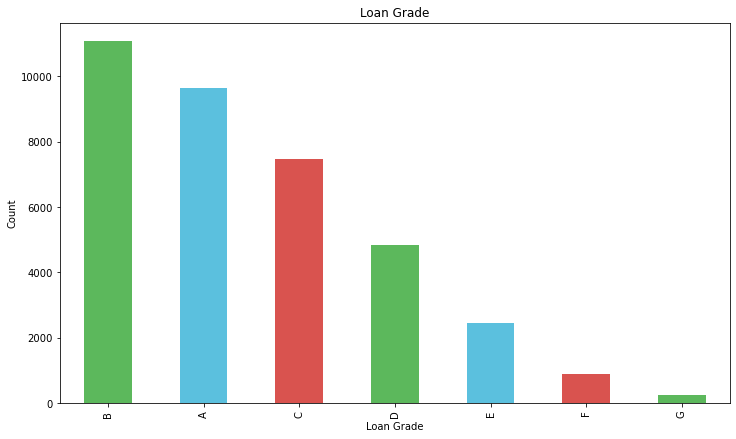

In [44]:
fig, ax = plt.subplots(figsize=(12,7))
loan['grade'].value_counts().plot(kind='bar', color = colors_list)
plt.title('Loan Grade')
ax.set_xlabel("Loan Grade")
ax.set_ylabel("Count")
plt.show()

The above graph shows loan grade of borrowers.Loan grading is used to assign a quality score to a loan based on the credit history of the borrower, quality of the collateral, and the likelihood of the repayment. Here we can observe, most of the loans sanctioned are given to borrowers having 'B' grade.

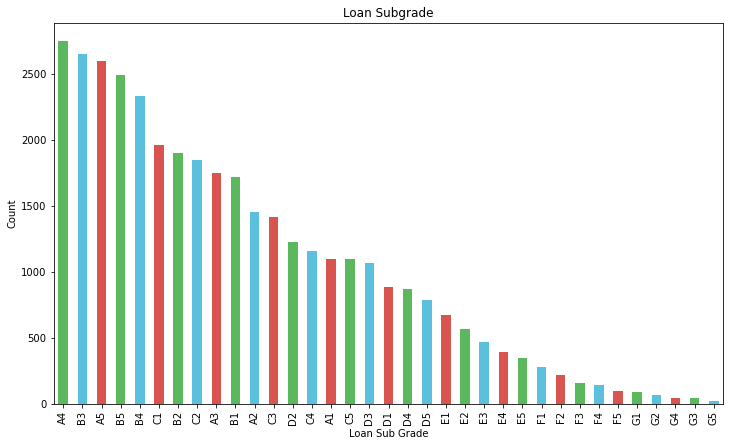

In [45]:
fig, ax = plt.subplots(figsize=(12,7))
loan['sub_grade'].value_counts().plot(kind='bar', color = colors_list)
plt.title('Loan Subgrade')
ax.set_xlabel("Loan Sub Grade")
ax.set_ylabel("Count")
plt.show()

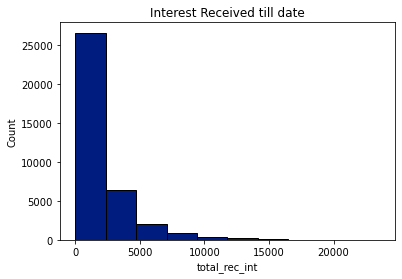

In [46]:
fig, ax = plt.subplots()
ax.hist(loan['total_rec_int'], 10, edgecolor='black')
ax.set_title("Interest Received till date")
ax.set_xlabel("total_rec_int")
ax.set_ylabel("Count")
plt.show()

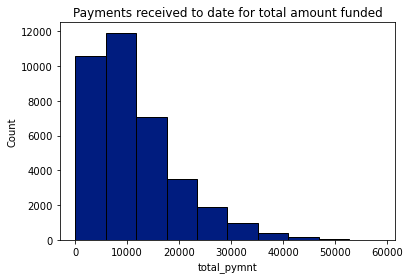

In [47]:
fig, ax = plt.subplots()
ax.hist(loan['total_pymnt'], 10, edgecolor='black')
ax.set_title("Payments received to date for total amount funded")
ax.set_xlabel("total_pymnt")
ax.set_ylabel("Count")
plt.show()

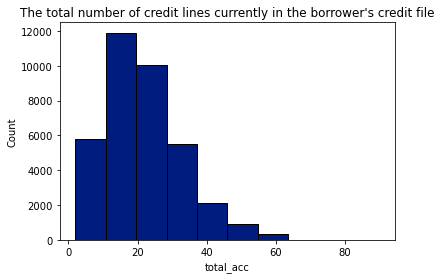

In [48]:
fig, ax = plt.subplots()
ax.hist(loan['total_acc'], 10, edgecolor='black')
ax.set_title("The total number of credit lines currently in the borrower's credit file")
ax.set_xlabel("total_acc")
ax.set_ylabel("Count")
plt.show()

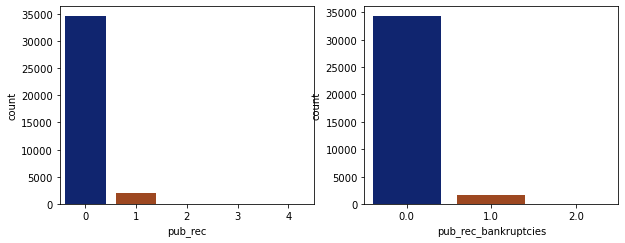

In [49]:
# sns.set_palette("Oranges_r")
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x = 'pub_rec', data = loan)
plt.subplot(222)
sns.countplot(x = 'pub_rec_bankruptcies', data = loan)
plt.show()

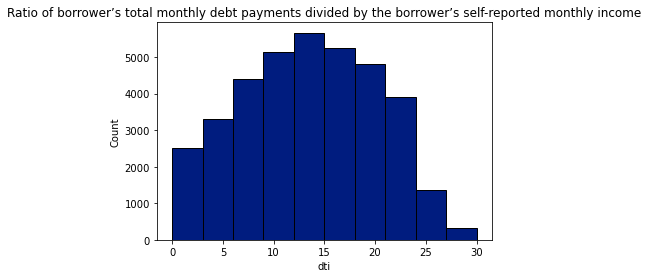

In [50]:
fig, ax = plt.subplots()
ax.hist(loan['dti'], 10, edgecolor='black')
ax.set_title("Ratio of borrower’s total monthly debt payments divided by the borrower’s self-reported monthly income")
ax.set_xlabel("dti")
ax.set_ylabel("Count")
plt.show()

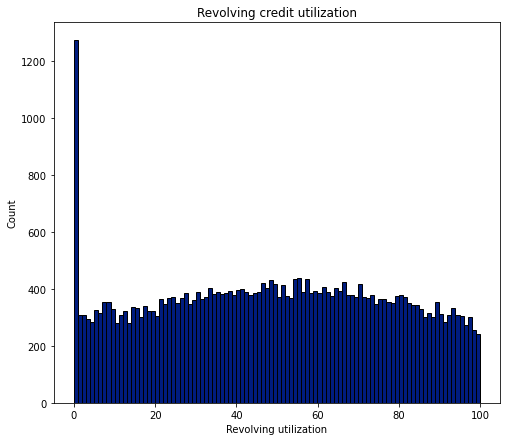

In [51]:
selected_rows = loan['revol_util'].sort_values()
fig, ax = plt.subplots(figsize=(8,7))
ax.hist(selected_rows,100, edgecolor='black')
ax.set_title("Revolving credit utilization")
ax.set_xlabel("Revolving utilization")
ax.set_ylabel("Count")
plt.show()


### Bivariate Analysis

**Annual income Vs Loan amount**

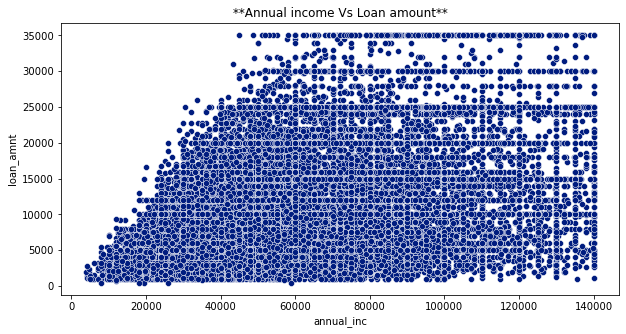

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(loan['annual_inc'],loan['loan_amnt'])
plt.title('**Annual income Vs Loan amount**')
plt.show()

**Observations**

* Income range from 120000 - 140000 are highly paid consumers in the data, they are less likely to take loan for higher amount.
* And the consumers with less annual income (0-20000) are taking loan for lesser amount.
* As it is obvious observation that the banks generally don't offer loans whose annual income is below their criteria. Vice versa those whose annual range is more need not likely to tak loan and therefore their records are less.

**Interest Rate Vs loan amount**

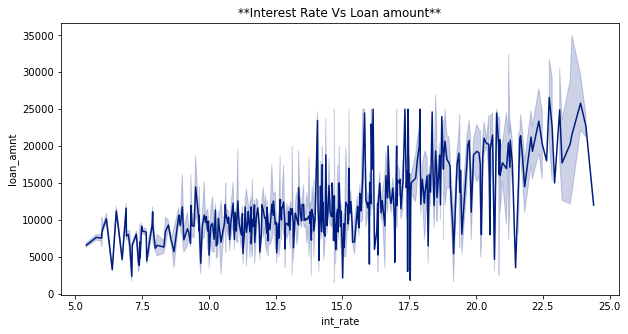

In [53]:
plt.figure(figsize=(10,5))
sns.lineplot(loan['int_rate'],loan['loan_amnt'])
plt.title('**Interest Rate Vs Loan amount**')
plt.show()

**Observations**
* As the loan amount increases, interest rate also increases.
* We can say that the higher the loan amount more the interest rate.

**Loan amount Vs Purpose**

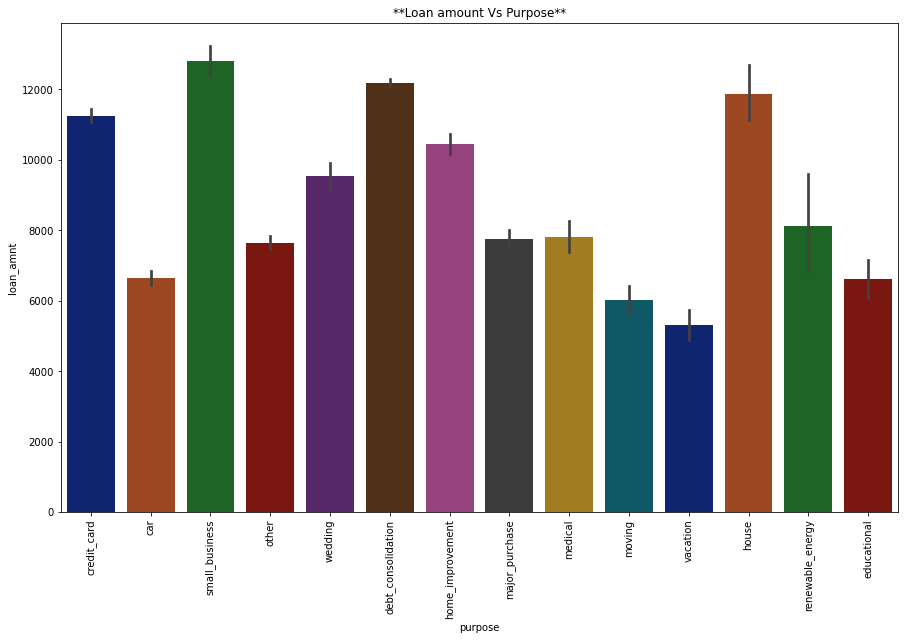

In [54]:
plt.figure(figsize=(15,9))
sns.barplot(data =loan, x='purpose',y='loan_amnt',palette="dark")
plt.title('**Loan amount Vs Purpose**')
plt.xticks(rotation=90)
plt.show()

**Observations**
* Consumers take higher amount of loan for purpose like: small_business, debt_consolidation, house and vacation.
* Less amount of loan is taken for vacation purpose.

**Annual Income Vs Purpose**

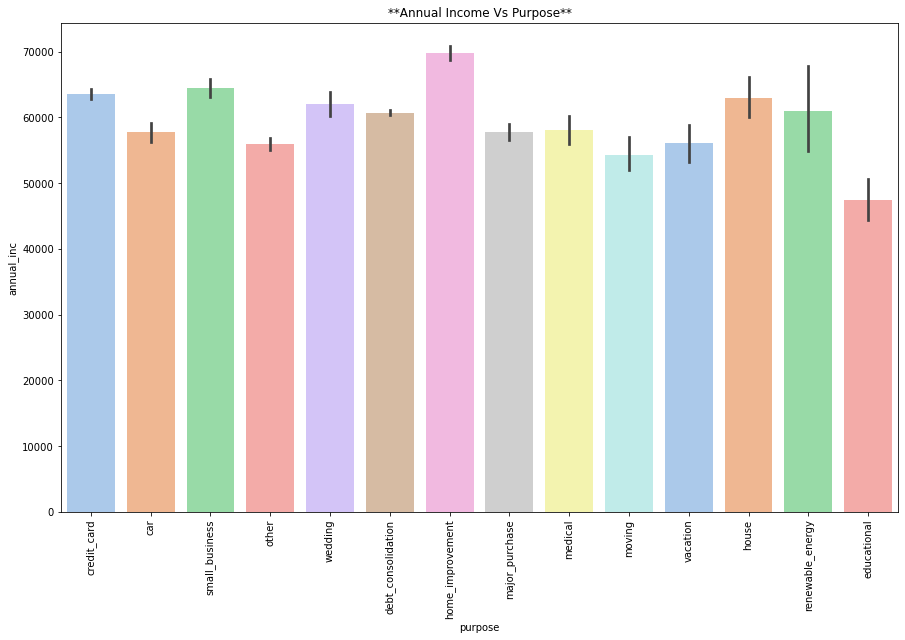

In [55]:
plt.figure(figsize=(15,9))
p= sns.barplot(data =loan, x='purpose',y=loan['annual_inc'],palette="pastel")
plt.title('**Annual Income Vs Purpose**')
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.show()

**Observations**
* Most consumers having annual income in between 60000-70000 are taking loan for following purpose:
    * home_improvement 
    * debt_consolidation
    * house
    * credit_card
    * wedding
* And those consumers having annual income approx 50000 takes loan for education purpose.

**Loan Amount Vs Home ownership wrt Loan status**

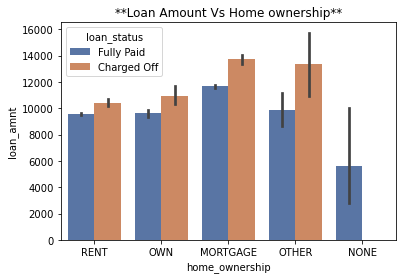

In [56]:
sns.barplot(data =loan, x='home_ownership',y='loan_amnt',hue= 'loan_status',palette="deep")
plt.title('**Loan Amount Vs Home ownership**')
plt.show()

**Observations**
* Most consumers opt for large loan amount. and are having their home ownership as mortgage.

**Loan Amount Vs Issue Year and Month**

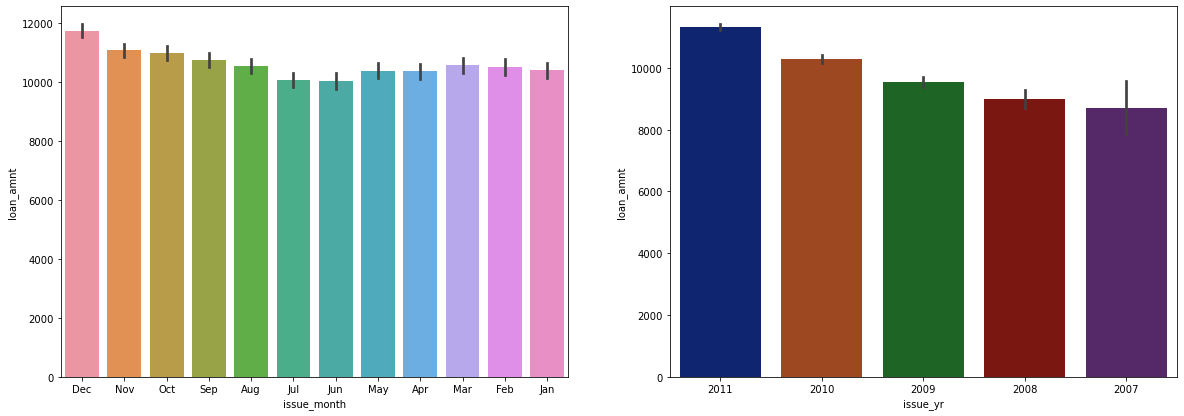

In [57]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='issue_month')
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='issue_yr')
plt.show()

**Observations**
* Months like nov and dec has more number of records as we saw in the univaraite analysis.
* In the year 2011 more consumers opted for large amount of loan

**Employment length Vs Annual Income  & Loan Amount**

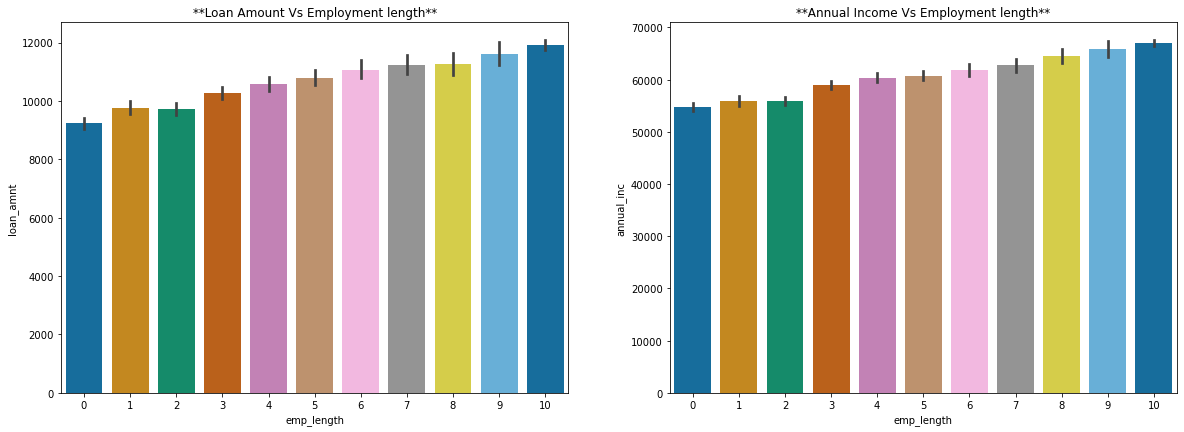

In [58]:
plt.figure(figsize=(20,15))
emp_len_yrs = [0,'1','2','3','4','5','6','7','8','9','10']
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length',palette="colorblind", order=emp_len_yrs)
plt.title("**Loan Amount Vs Employment length**")

plt.subplot(222)
sns.barplot(data =loan,y='annual_inc', x='emp_length',palette="colorblind",order=emp_len_yrs)
plt.title("**Annual Income Vs Employment length**")

plt.show()

**Observations**
* Here we can see loan amount and annual income follow almost same trend for the conusmers employment length.
* That means there is an increasing trend for loan_amount as well as annual income with the increase in years of employment.

**Loan_status Vs Annual Income and Loan Amount**

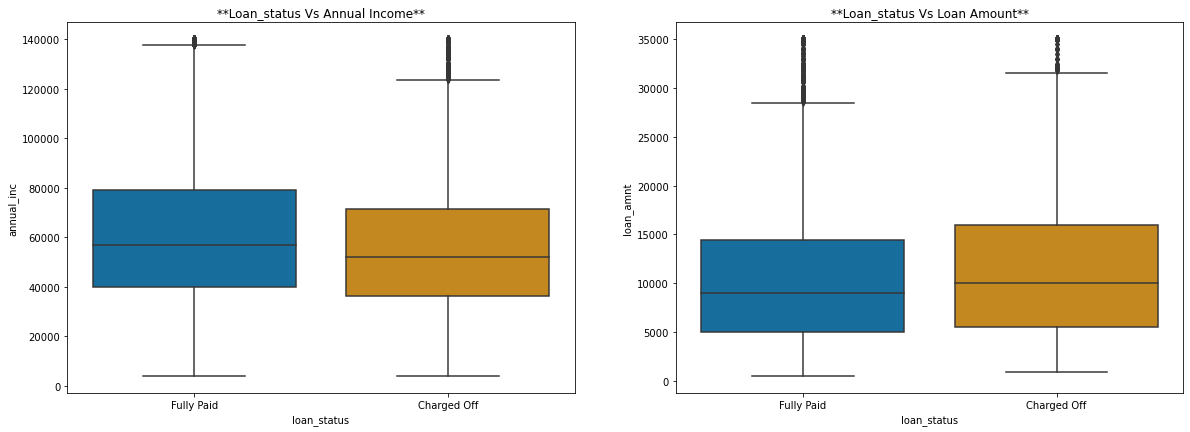

In [59]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.boxplot(data =loan, x='loan_status',y='annual_inc',palette="colorblind")
plt.title('**Loan_status Vs Annual Income**')
plt.subplot(222)
sns.boxplot(data =loan, x='loan_status',y='loan_amnt',palette="colorblind")
plt.title('**Loan_status Vs Loan Amount**')
plt.show()

**Observations**
* Charged_off(defaulters) are having less annual income as compared to fully_paid consumers.
* Defaulters demands for larger amount of loan as compared to fully paid

**Loan_status Vs Grade Percentage**

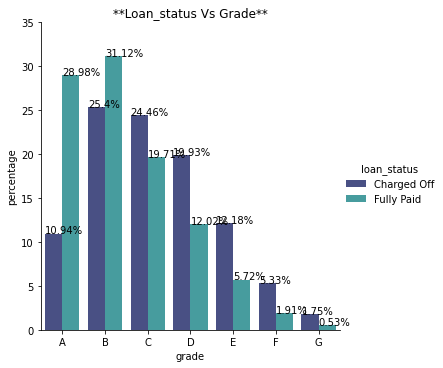

In [60]:
loan_status_grade = (loan.groupby(['loan_status'])['grade']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('grade'))
g = sns.catplot(x="grade", y="percentage", hue="loan_status",kind='bar', data=loan_status_grade, palette='mako')
plt.title('**Loan_status Vs Grade**')
g.ax.set_ylim(0,35)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


**Observations**
* we can see that charged_off consumers have more percentage of grade C, D, E, F & G as compared to fully_paid consumers. The variable "grade" explains about the credit history of the consumer. 

**Loan_status Vs sub_grade Proportion**

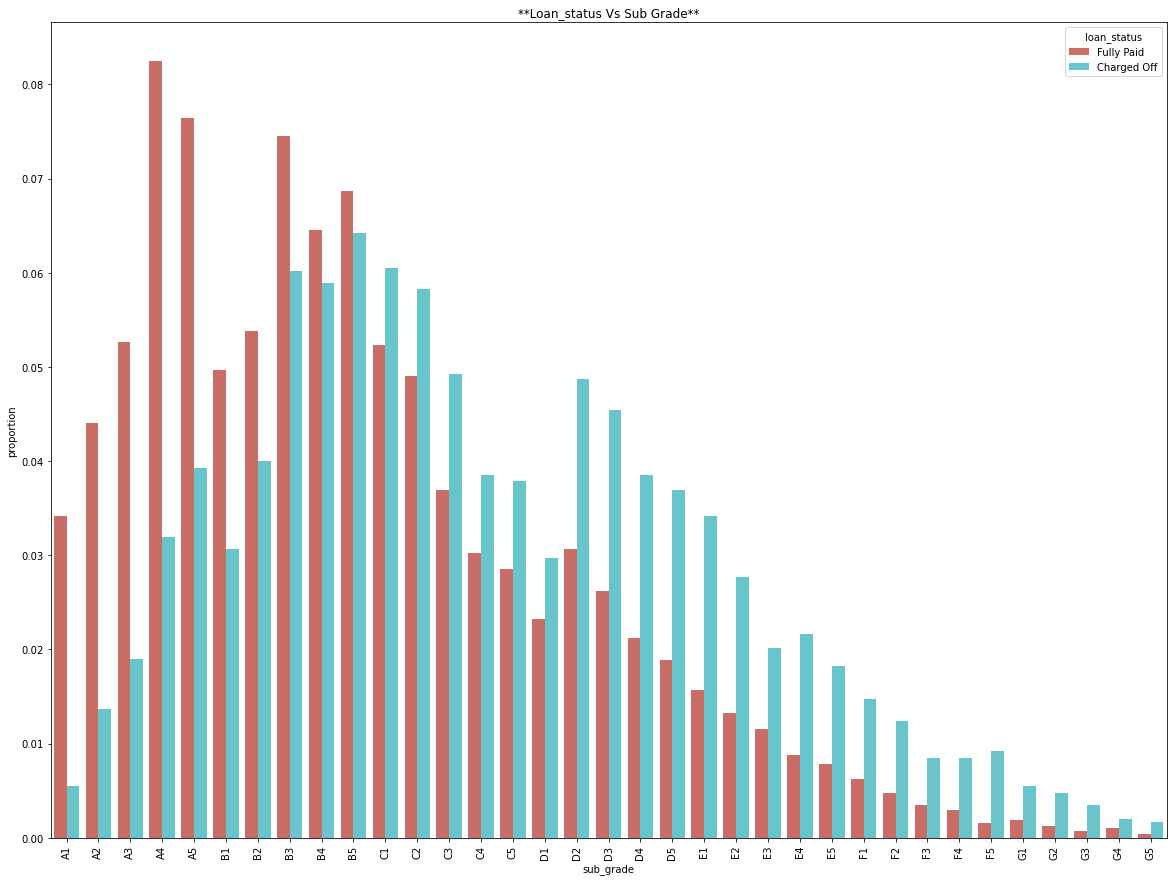

In [61]:
plt.figure(figsize=(20,15))

loan_status_purpose = (loan.groupby(['loan_status'])['sub_grade']
                     .value_counts(normalize=True)
                     .rename('proportion')
                     
                     .reset_index()
                     .sort_values('sub_grade'))
p = sns.barplot(x="sub_grade", y="proportion", hue="loan_status", data=loan_status_purpose,palette='hls')
plt.title('**Loan_status Vs Sub Grade**')
_ = plt.setp(p.get_xticklabels(), rotation=90) 


**Observations**
* Here we can see a trend that consumers with charged_off have initially(A1,A2,A3,A4,A5,B1,B2,B3,B4,B5) lower proportion then fully_paid consumers.
* But gradually the proportion of charged_off increase and fully_paid decreases from subgrade C1 onwards.

**Loan_status Vs Purpose Proportion**

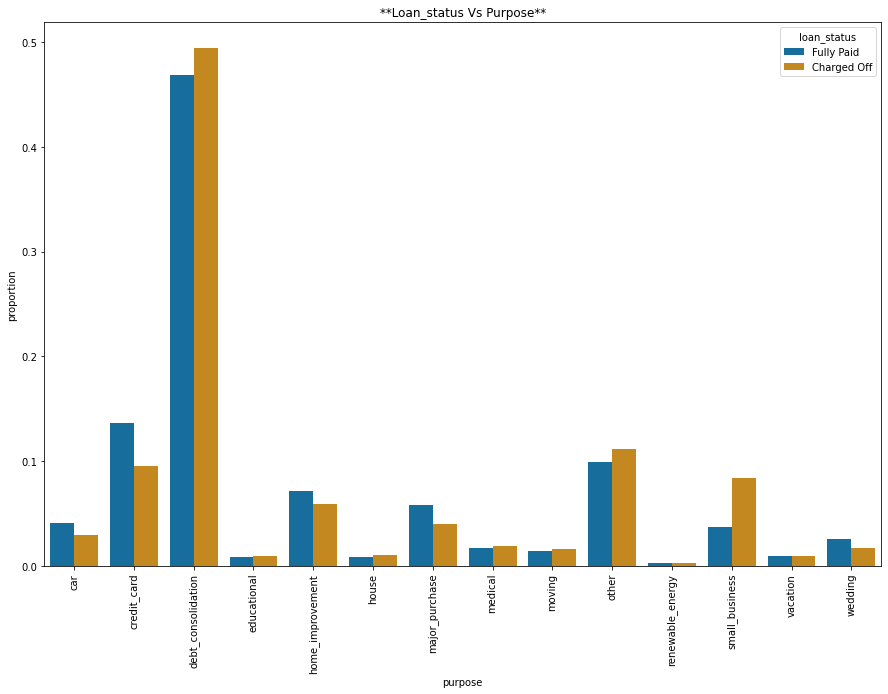

In [62]:
plt.figure(figsize=(15,10))

loan_status_purpose = (loan.groupby(['loan_status'])['purpose']
                     .value_counts(normalize=True)
                     .rename('proportion')
                     .reset_index()
                     .sort_values('purpose'))
p = sns.barplot(x="purpose", y="proportion", hue="loan_status", data=loan_status_purpose ,palette='colorblind')
plt.title('**Loan_status Vs Purpose**')

_ = plt.setp(p.get_xticklabels(), rotation=90) 

**Observations**
* We can see that charged_off consumers are taking more loans for the purpose "debt_consolidation"
* Also for the purpose like "small_business" and "other" has comparatively more proportion of charged_off consumers.

**Loan_status Vs Term Percentage**

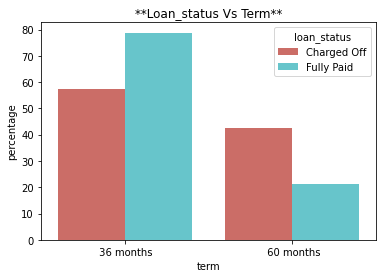

In [63]:
loan_status_purpose = (loan.groupby(['loan_status'])['term']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('term'))
p = sns.barplot(x="term", y="percentage", hue="loan_status", data=loan_status_purpose ,palette='hls')
plt.title('**Loan_status Vs Term**')
plt.show()

**Observations**
* Charged_off consumers takes loan for more number of years as compared to fully_paid consumers

**Annual Income Vs Issue month & Issue year wrt Loan Status**

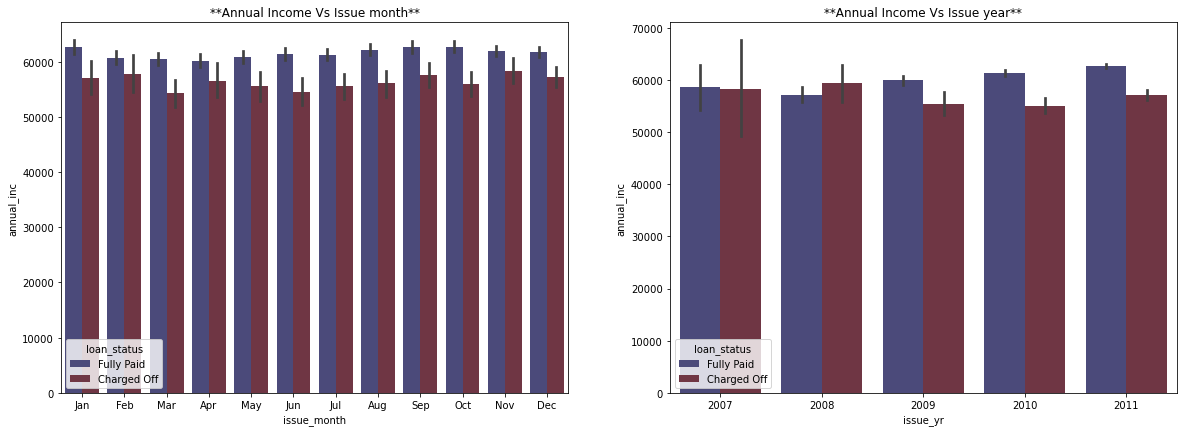

In [64]:
plt.figure(figsize=(20,15))
plt.subplot(221)
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(data =loan,y='annual_inc', x='issue_month', hue ='loan_status',palette="icefire", order= Months)
plt.title('**Annual Income Vs Issue month**')
plt.subplot(222)
Year = ['2007','2008','2009','2010','2011']
sns.barplot(data =loan,y='annual_inc', x='issue_yr', hue ='loan_status',palette="icefire", order=Year)
plt.title('**Annual Income Vs Issue year**')
plt.show()

**Observations**
* Annual income is lesser for charged_off consumers as compared fully_paid.

**Loan Amount Vs Issue month & Issue year wrt Loan Status**

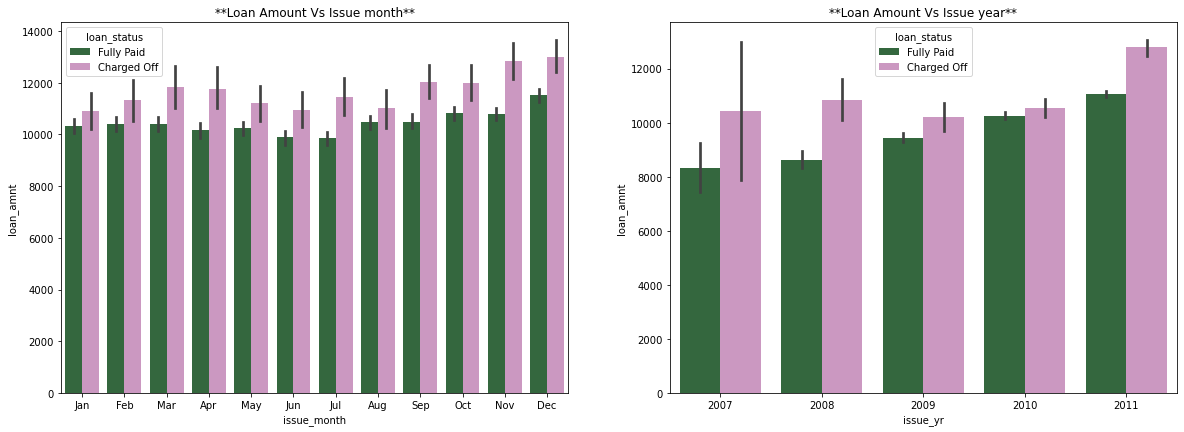

In [65]:
plt.figure(figsize=(20,15))
plt.subplot(221)
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(data =loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="cubehelix", order= Months)
plt.title('**Loan Amount Vs Issue month**')
plt.subplot(222)
Year = ['2007','2008','2009','2010','2011']
sns.barplot(data =loan,y='loan_amnt', x='issue_yr', hue ='loan_status',palette="cubehelix", order=Year)
plt.title('**Loan Amount Vs Issue year**')
plt.show()

**Observations**
* As both the graphs signifies, that the loan amount is more for charged_off consumers as compared to fully_paid.
* Also, there is an increasing trend for the number of consumers taking loan.

**Loan_status Vs Issue Month**

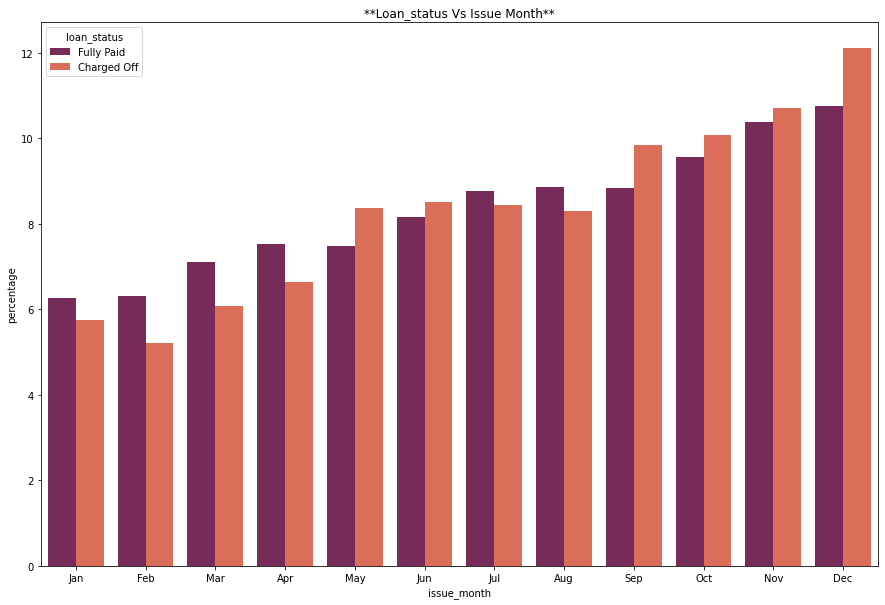

In [66]:
plt.figure(figsize=(15,10))
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
loan_status_purpose = (loan.groupby(['loan_status'])['issue_month']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('issue_month'))
p = sns.barplot(x="issue_month", y="percentage", hue="loan_status", data=loan_status_purpose,palette='rocket', order=Months)
plt.title('**Loan_status Vs Issue Month**')
plt.show()

**Observations**
* We observe that, mostly consumers are taking loan in the year end.
* The graphs shows,more charged_off consumers take loan in the months Sept, Oct, Nov & Dec as compared to fully_paid.

**Loan_status Vs Revolving line utilization rate**

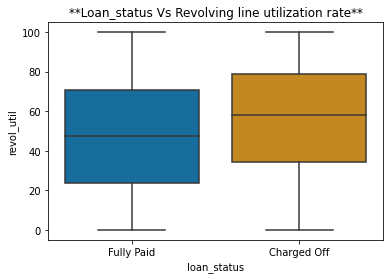

In [67]:
sns.boxplot(data =loan, x='loan_status',y='revol_util',palette="colorblind")
plt.title('**Loan_status Vs Revolving line utilization rate**')
plt.show()

**Observations**
* The graphs shows bit difference in the range of the fully_paid and charged_off consumers. Charged_off consumers have bit higher range.

**Loan_status Vs Home Ownership**'

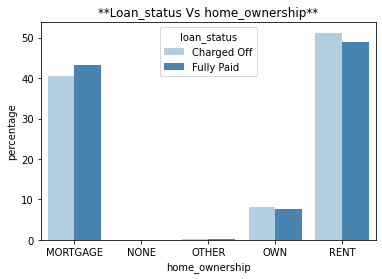

In [68]:
df = (loan.groupby(['loan_status'])['home_ownership']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('home_ownership'))
p = sns.barplot(x="home_ownership", y="percentage", hue="loan_status", data=df,palette='Blues')
plt.title('**Loan_status Vs home_ownership**')
plt.show()

**Observations**
* More than 50% of the charged_off consumers are living with RENT 
* And very least who OWNs a house are taking loan.

**Loan_status Vs  total_acc & open_acc**

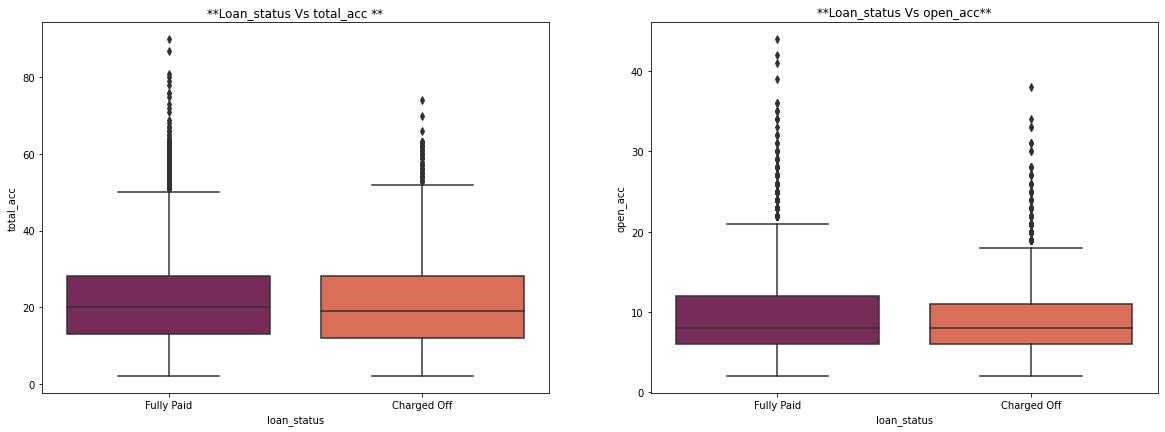

In [69]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.boxplot(data =loan, x='loan_status',y='total_acc',palette="rocket")
plt.title('**Loan_status Vs total_acc **')
plt.subplot(222)
sns.boxplot(data =loan, x='loan_status',y='open_acc',palette="rocket")
plt.title('**Loan_status Vs open_acc**')
plt.show()

In [70]:
print(loan['total_acc'].describe())

count    36654.000000
mean        21.641349
std         11.232836
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64


**Observations**
* No major difference range difference can be observed for charged_off and fully_paid consumers in both the graphs.
* In total_acc, we could see there are more extremities in the data as the 75% data is in the range 2-28 while the max value is 90.

**Loan_status Vs  dti**

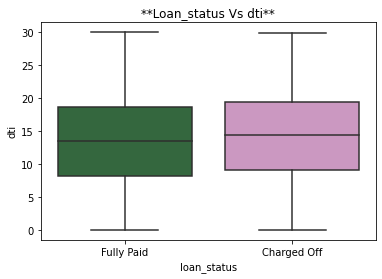

In [71]:
sns.boxplot(data =loan, x='loan_status',y='dti',palette="cubehelix")
plt.title('**Loan_status Vs dti**')
plt.show()

In [72]:
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5418.0,14.105788,6.587831,0.0,9.18,14.41,19.4075,29.85
Fully Paid,31236.0,13.332407,6.668141,0.0,8.20,13.43,18.5900,29.99


**Observations**
* Charged_off consumers have bit more dti than fully_paid consumers.

**Loan_status Vs Interest rate**

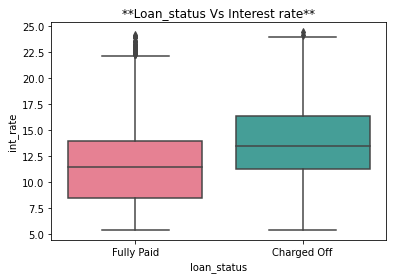

In [73]:
sns.boxplot(data =loan, x='loan_status',y='int_rate',palette="husl")
plt.title('**Loan_status Vs Interest rate**')
plt.show()

In [74]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5418.0,13.757817,3.630824,5.42,11.26,13.49,16.32,24.40
Fully Paid,31236.0,11.563767,3.575435,5.42,8.49,11.49,13.98,24.11


**Observations**
* Charged_off consumers are taking loans on comparatively higher interest rate.
* Here we can see 50% data of charged_off consumers are paying loan at the interest rate range 11.26-16.32, while fully_paid has a range 8.49-11.49

**Loan_status Vs verification_status**

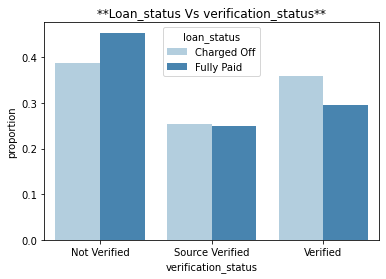

In [75]:
df = (loan.groupby(['loan_status'])['verification_status']
                     .value_counts(normalize=True)
                     .rename('proportion')
                     .reset_index()
                     .sort_values('verification_status'))
p = sns.barplot(x="verification_status", y="proportion", hue="loan_status", data=df,palette='Blues')
plt.title('**Loan_status Vs verification_status**')
plt.show()

**Observations**
* Here we can see a wierd trend, among those consumers who are not verified, there we can find more proportion of fully_paid.
* while those who are verified are having more proportion of charged_off consumers.

### Segmented Analysis

The loan dataframe is divided on the basis of whether the borrowers have fully paid back or whether the loan is charged off.

In [76]:
loan_fully_paid = loan[loan['loan_status']=='Fully Paid']
loan_charged_off = loan[loan['loan_status']=='Charged Off']


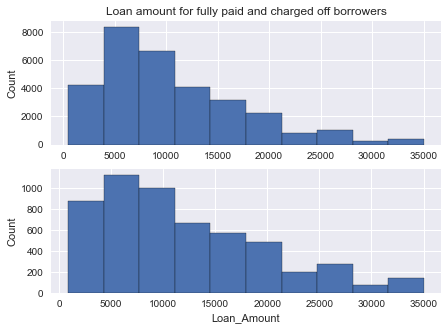

In [77]:
plt.style.use('seaborn')
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))
ax1.hist(loan_fully_paid['loan_amnt'], 10, edgecolor='black')
ax1.set_title("Loan amount for fully paid and charged off borrowers")
ax1.set_ylabel("Count")
ax2.hist(loan_charged_off['loan_amnt'], 10, edgecolor='black')
ax2.set_xlabel("Loan_Amount")
ax2.set_ylabel("Count")
plt.show()

**Observation**:
The loan amount distribution is almost similar for both the fully paid and charged off borrowers. Only count of people in each bucket of loan amount is higher for fully paid borrowers than charged off borrowers. 

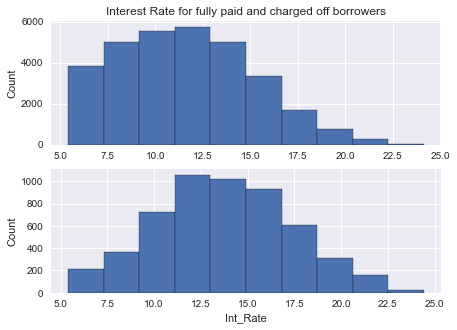

In [78]:
plt.style.use('seaborn')
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))
ax1.hist(loan_fully_paid['int_rate'], 10, edgecolor='black')
ax1.set_title("Interest Rate for fully paid and charged off borrowers")
ax1.set_ylabel("Count")
ax2.hist(loan_charged_off['int_rate'], 10, edgecolor='black')
ax2.set_xlabel("Int_Rate")
ax2.set_ylabel("Count")
plt.show()

**Observation**:
Here we observe that the distribution for interest rate of fully paid borrowers is right skewed suggesting greater number of people have paid lower interest rates.

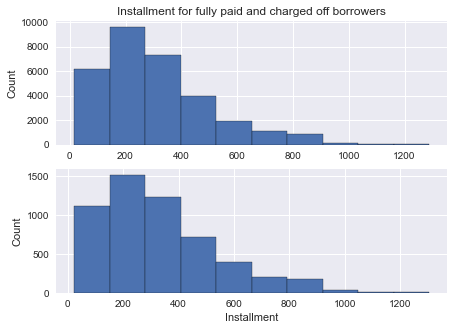

In [79]:
# plt.style.use('fivethirtyeight')
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))
ax1.hist(loan_fully_paid['installment'], 10, edgecolor='black')
ax1.set_title("Installment for fully paid and charged off borrowers")
ax1.set_ylabel("Count")
ax2.hist(loan_charged_off['installment'], 10, edgecolor='black')
ax2.set_xlabel("Installment")
ax2.set_ylabel("Count")
plt.show()

**Observation:**
The distribution is almost similar suggesting both categories have to pay equal amounts of installments.

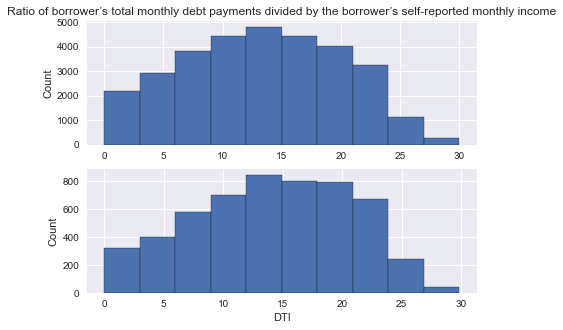

In [80]:
# plt.style.use('fivethirtyeight')
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))
ax1.hist(loan_fully_paid['dti'], 10, edgecolor='black')
ax1.set_title("Ratio of borrower’s total monthly debt payments divided by the borrower’s self-reported monthly income")
ax1.set_ylabel("Count")
ax2.hist(loan_charged_off['dti'], 10, edgecolor='black')
ax2.set_xlabel("DTI")
ax2.set_ylabel("Count")
plt.show()


**Observation:**
The distribution says the dti is slightly better for custmers in the dti range of 0-10 but fully paid but it is better for charged off people in the range 18-21.

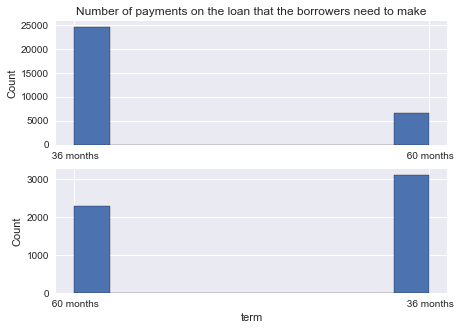

In [81]:
# plt.style.use('fivethirtyeight')
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))
ax1.hist(loan_fully_paid['term'], 10, edgecolor='black')
ax1.set_title("Number of payments on the loan that the borrowers need to make")
ax1.set_ylabel("Count")
ax2.hist(loan_charged_off['term'], 10, edgecolor='black')
ax2.set_xlabel("term")
ax2.set_ylabel("Count")
plt.show()

**Observation:**
Graphs suggest that number of payments made by fully paid borrowers in 60 months is much lesser than that of Charged off borrowers.

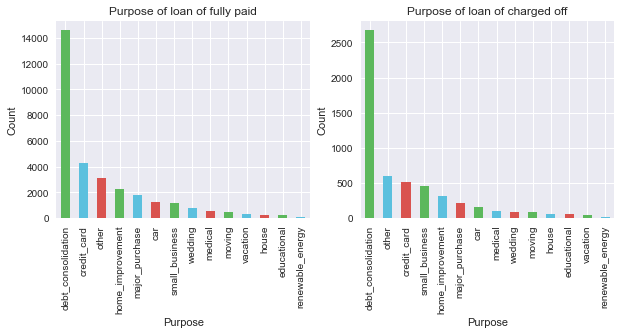

In [82]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title('Purpose of loan of fully paid')
m = loan_fully_paid['purpose'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Purpose')
m.set_ylabel('Count')
# plt.show()
plt.subplot(222)
plt.title('Purpose of loan of charged off')
m = loan_charged_off['purpose'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Purpose')
m.set_ylabel('Count')
plt.show()

**Observation:**
The graph suggests that for fully charged borrowers, main purpose for taking loan are debt_consolidation, credit_card, other, home_improvement whereas for the charged off customers, the first three are same and 

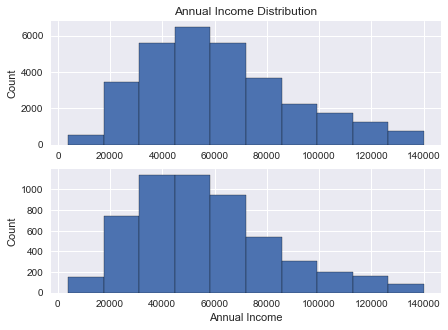

In [83]:
# plt.style.use('fivethirtyeight')
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))
ax1.hist(loan_fully_paid['annual_inc'], 10, edgecolor='black')
ax1.set_title("Annual Income Distribution")
ax1.set_ylabel("Count")
ax2.hist(loan_charged_off['annual_inc'], 10, edgecolor='black')
ax2.set_xlabel("Annual Income")
ax2.set_ylabel("Count")
plt.show()

**Observation:**
The annual income distribution range is almost equal in both graphs.

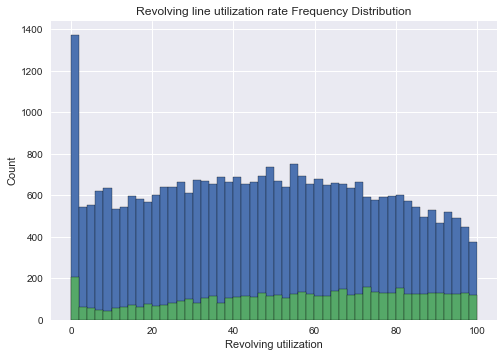

In [84]:
# plt.style.use('fivethirtyeight')
plt.title("Revolving line utilization rate Frequency Distribution")
plt.hist(loan_fully_paid['revol_util'], 50, edgecolor='black')
plt.xlabel("Revolving utilization")
plt.ylabel("Count")
plt.hist(loan_charged_off['revol_util'], 50, edgecolor='black')
plt.show()

**Observation:**
From the distribution of Revolving line utilization rate Frequency Distribution, we can understand that the highest amounts of revolving credit limit is in the range 0-2. This is an ideal situation as for LC as lower the revol_util amount, better is the credit score. 
For higher values like 98-100, we can see the revol_util amount is smaller for fully charged whereas it is higher for charged off borrowers.

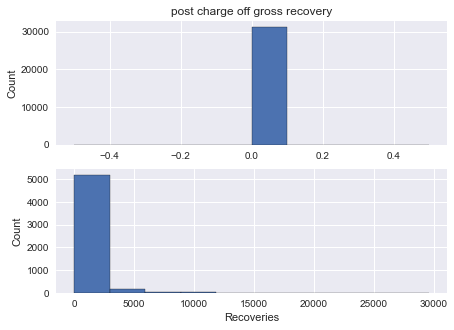

In [85]:
# plt.style.use('fivethirtyeight')
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(7,5))
ax1.hist(loan_fully_paid['recoveries'], 10, edgecolor='black')
ax1.set_title("post charge off gross recovery")
ax1.set_ylabel("Count")
ax2.hist(loan_charged_off['recoveries'], 10, edgecolor='black')
ax2.set_xlabel("Recoveries")
ax2.set_ylabel("Count")
plt.show()

**Observation:**
As expected, post charge-off gross recovery is very low, i.e. in the range of 0.0 to 0.1 for the fully paid borrowers but significantly higher in the range of 0-5000 for the charged-off borrowers.

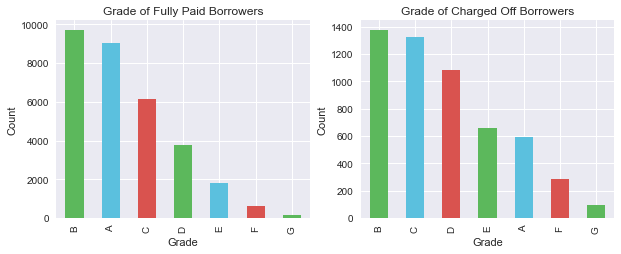

In [86]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title('Grade of Fully Paid Borrowers')
m = loan_fully_paid['grade'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Grade')
m.set_ylabel('Count')
plt.subplot(222)
plt.title('Grade of Charged Off Borrowers')
m = loan_charged_off['grade'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Grade')
m.set_ylabel('Count')
plt.show()

**Observations:**
We can see that the top 3 grades of fully paid borrowers are A,B and C whereas it is B,C and D for Charged off borrowers.

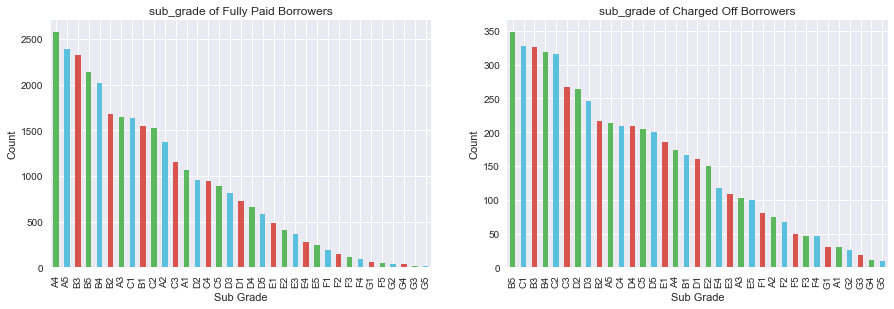

In [87]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('sub_grade of Fully Paid Borrowers')
m = loan_fully_paid['sub_grade'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Sub Grade')
m.set_ylabel('Count')
plt.subplot(222)
plt.title('sub_grade of Charged Off Borrowers')
m = loan_charged_off['sub_grade'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Sub Grade')
m.set_ylabel('Count')
plt.show()


**Observation:**
We can see that the top 3 sub_grades of fully paid borrowers are A4,A5 and B3 whereas it is B5,C1 and B3 for Charged off borrowers. The lowest is G5 in both cases.

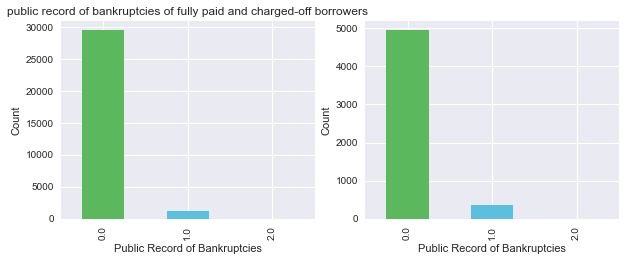

In [88]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.title('public record of bankruptcies of fully paid and charged-off borrowers')
m = loan_fully_paid['pub_rec_bankruptcies'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Public Record of Bankruptcies')
m.set_ylabel('Count')
plt.subplot(222)
m = loan_charged_off['pub_rec_bankruptcies'].value_counts().plot(kind='bar', color = colors_list)
m.set_xlabel('Public Record of Bankruptcies')
m.set_ylabel('Count')
plt.show()

**Observations:**
The public record of bankruptcies is mostly 0 in both the cases. Nothing much can be inferred by looking at this attribute

The loan dataframe is divided on the basis of whether the borrowers have fully paid back or whether the loan is charged off.

In [89]:
borrower_home_ownership_MORTGAGE = loan[loan['home_ownership']=='MORTGAGE']
borrower_home_ownership_NONE = loan[loan['home_ownership']=='NONE']
borrower_home_ownership_OTHER = loan[loan['home_ownership']=='OTHER']
borrower_home_ownership_OWN = loan[loan['home_ownership']=='OWN']
borrower_home_ownership_RENT = loan[loan['home_ownership']=='RENT']
borrow = [borrower_home_ownership_MORTGAGE,borrower_home_ownership_NONE,borrower_home_ownership_OTHER,borrower_home_ownership_OWN,borrower_home_ownership_RENT]

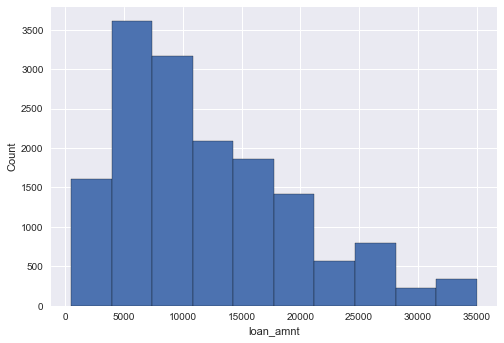

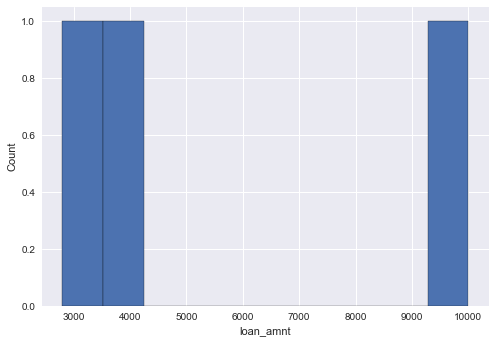

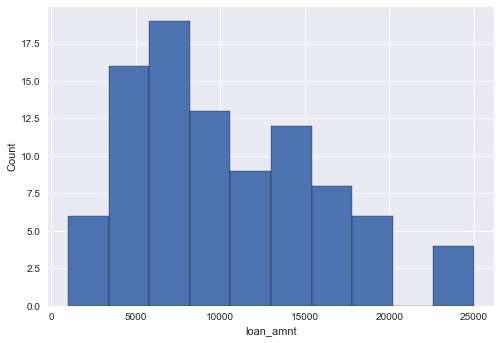

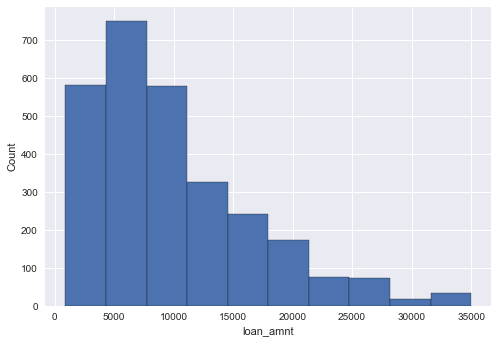

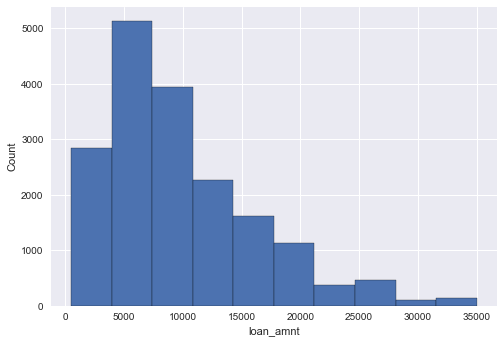

In [90]:
def borrow_plot(li,j):
    for i in li:
        fig, ax = plt.subplots()
        ax.hist(i[j], 10, edgecolor='black')
        ax.set_xlabel(j)
        ax.set_ylabel("Count")
        plt.show()

borrow_plot(borrow,'loan_amnt')

**Observations:**
1. The loan amount of borrowers is highest in the range of 5000-10000 for borrowers having MORTGAGE, OTHER, OWN and RENT lands.It is maximum in 3000-4000 range for home_ownership= NONE.
2. The count of people taking high loan amounts in the range 32500-35000 is very low across all the categories of home_ownership.

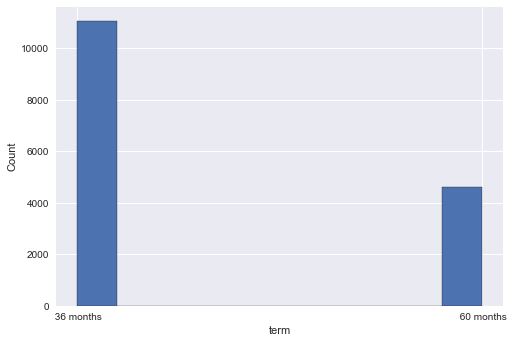

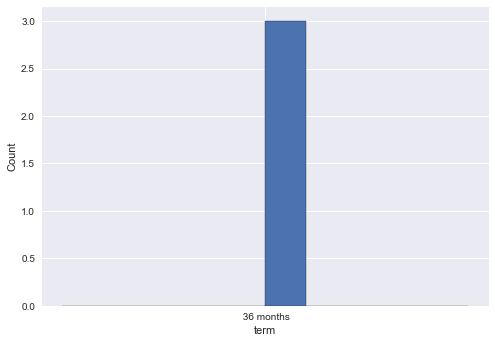

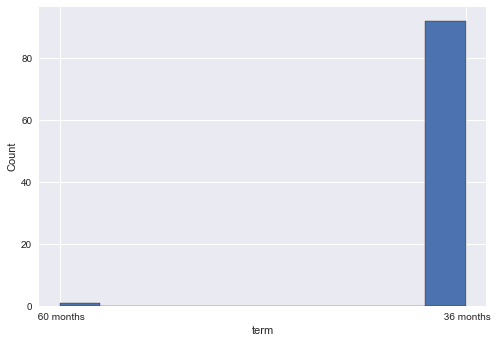

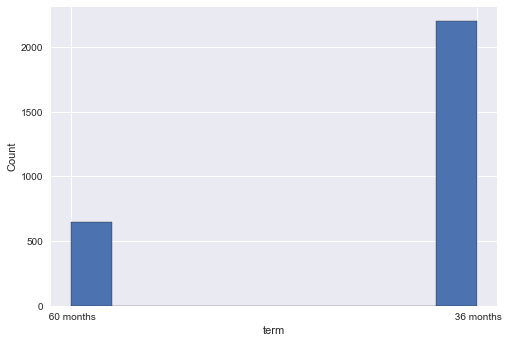

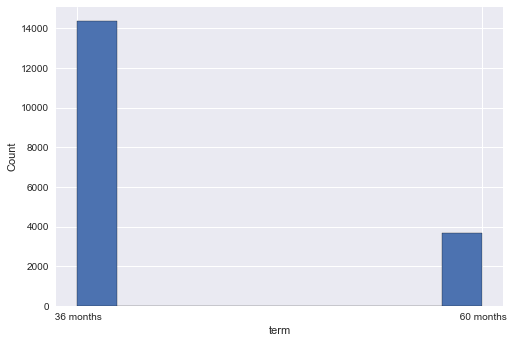

In [91]:
borrow_plot(borrow,'term')

**Observation:**
The term for which loan is taken is 36 months across all the lines of home ownership.

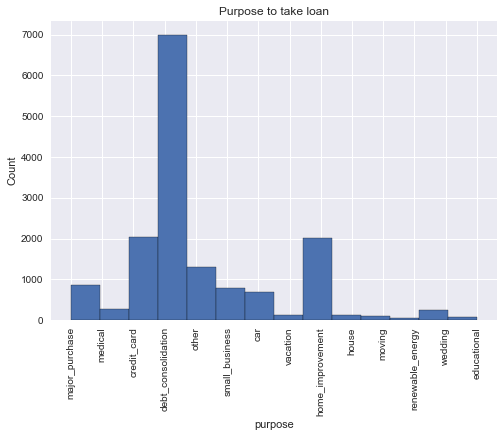

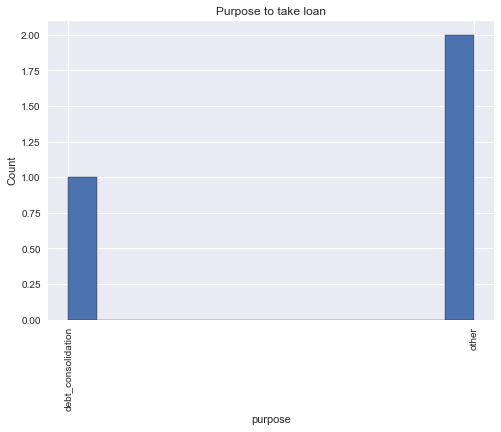

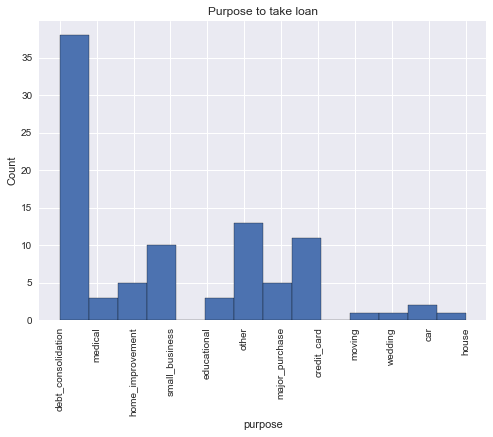

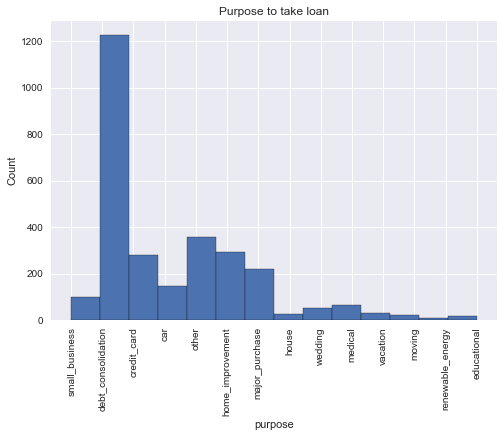

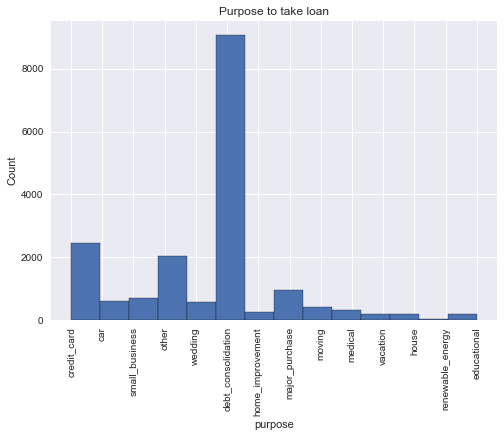

In [92]:
def purpose_plot(li):
    for i in li:
        fig, ax = plt.subplots()
        ax.hist(i['purpose'], 14, edgecolor='black')
        ax.set_title("Purpose to take loan")
        ax.set_xlabel("purpose")
        plt.xticks(rotation=90)
        ax.set_ylabel("Count")
        plt.show()

purpose_plot(borrow)

**Observations:**
1. We observe the purpose of loan taken is debt_consolidation for maximum count of people for mortgage, other, own and rent home ownership, other is maximum for none home ownership.
2. The least count varies widely with renewable energy being the purpose in most cases.

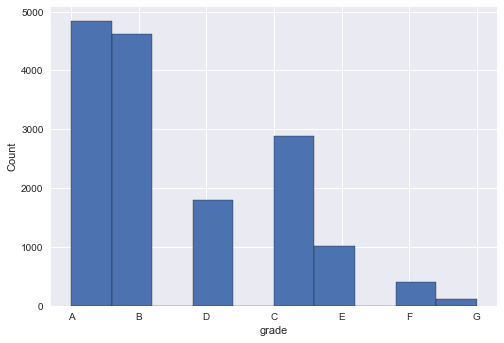

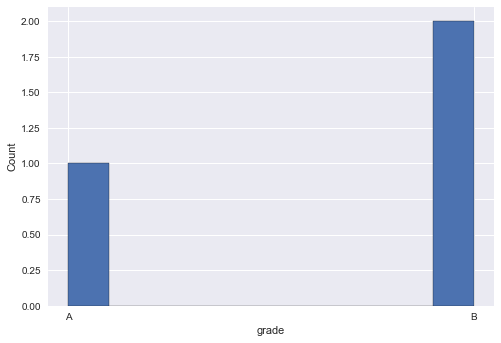

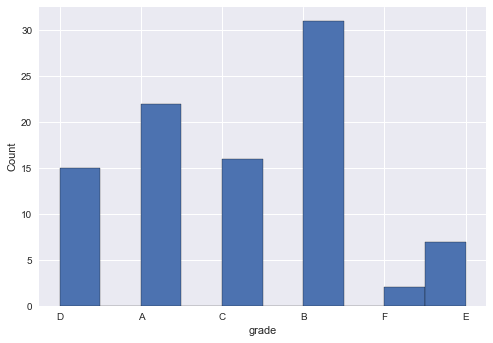

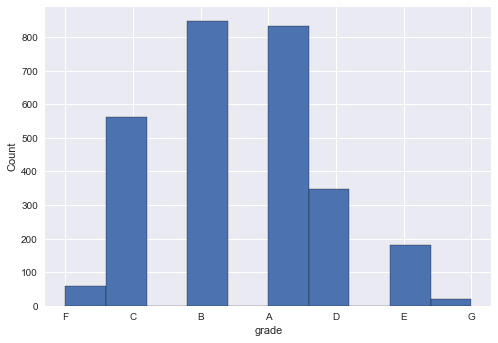

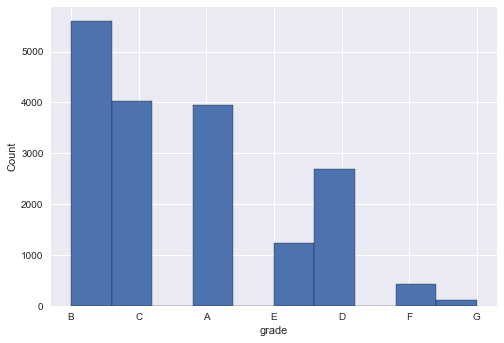

In [93]:
borrow_plot(borrow,'grade')

**Observations:**
1. The grade of borrowers is A and B across all the lines of home_onership.
2. A significant number of borrowers having C and D grades are also provided loan in certain lines of business.

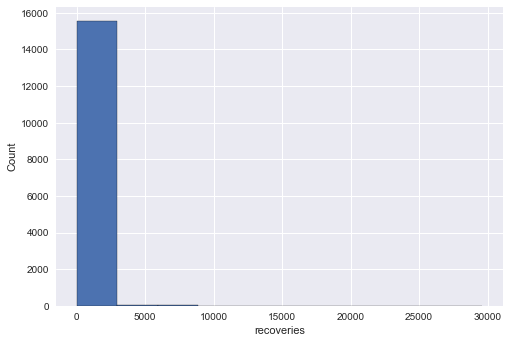

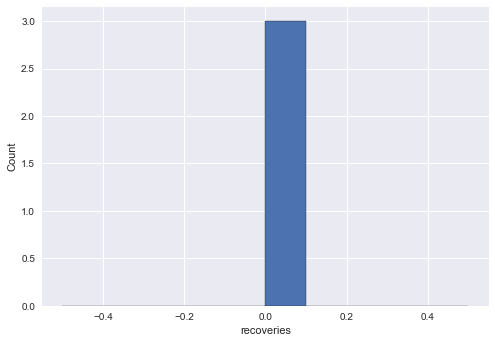

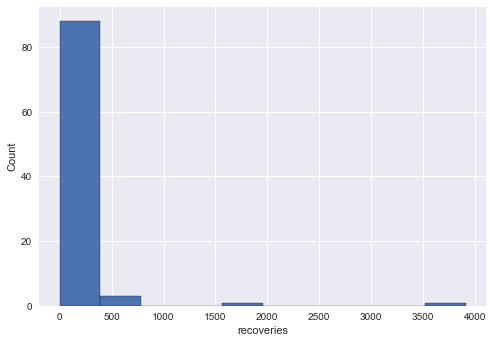

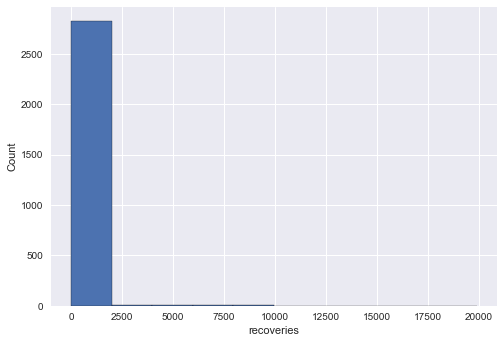

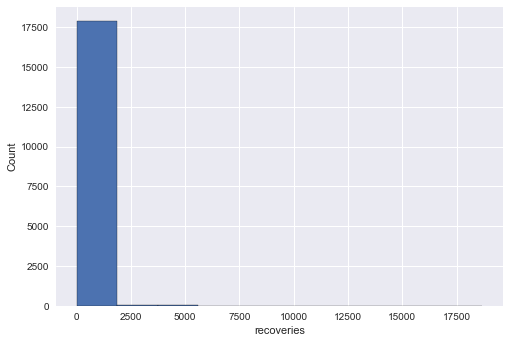

In [94]:
borrow_plot(borrow,'recoveries')

**Observations:**
It is maximum in 0-500 range in most of the cases. This attribute is not useful for our analysis.

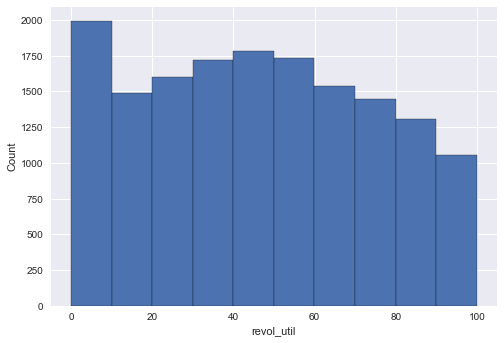

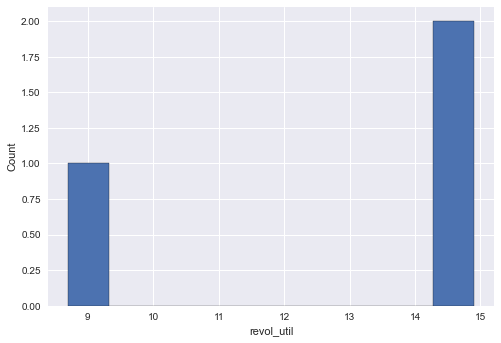

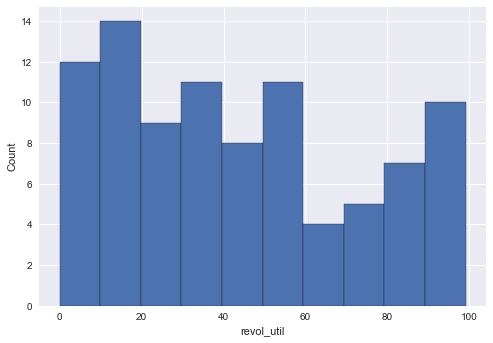

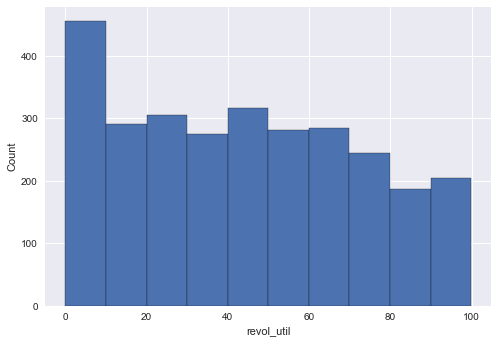

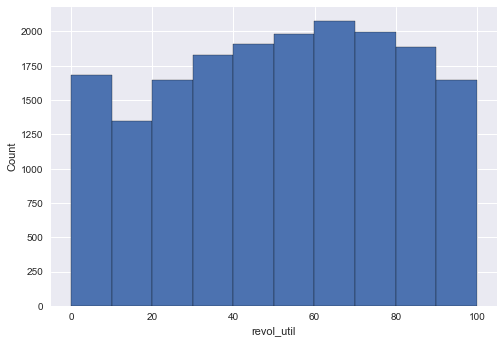

In [95]:
borrow_plot(borrow,'revol_util')

**Observations:**
1. The maximum distribution is varying greatly across the lines - revol util is in 0-10 range for mortgage , 14-15 for None, 10-20 for other, 0-10 for own and 60-70 for rent home ownerships.
2. Similarly, the minimum values are in 10-20 range for mortgage , 9 for None, 60-70 for other, 80-90 for own and 10-20 for rent home ownerships.

We divide the loan dataframe once again according to the verification status to analyze how each category is performing based on certain attributes.

In [96]:
verified = loan[loan['verification_status']=='Verified']
not_verified = loan[loan['verification_status']=='Not Verified']
source_verified = loan[loan['verification_status']=='Source Verified']
li = [verified,not_verified,source_verified]

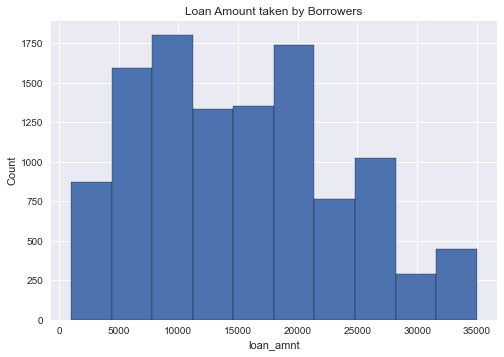

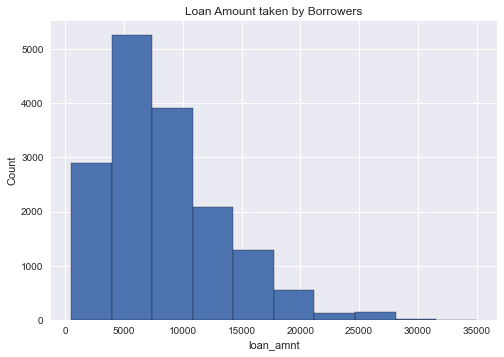

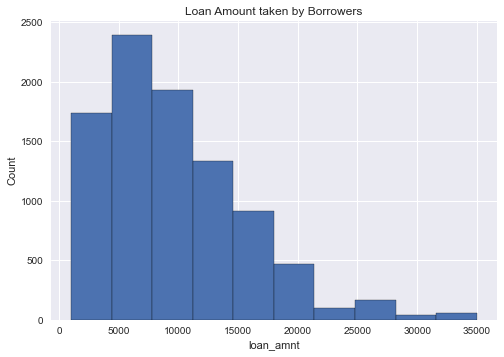

In [97]:
def loan_plotter(li):
    for i in li:
        fig, ax = plt.subplots()
        ax.hist(i['loan_amnt'], 10, edgecolor='black')
        ax.set_title("Loan Amount taken by Borrowers")
        ax.set_xlabel("loan_amnt")
        ax.set_ylabel("Count")
        plt.show()
loan_plotter(li)


**Observation:**
The loan amounts taken by borrowers is right skewed for all the 3 verification status viz. Verified, Not Verified and Not Sourced. It is maximum in the range 5000-10000 in all the three cases.

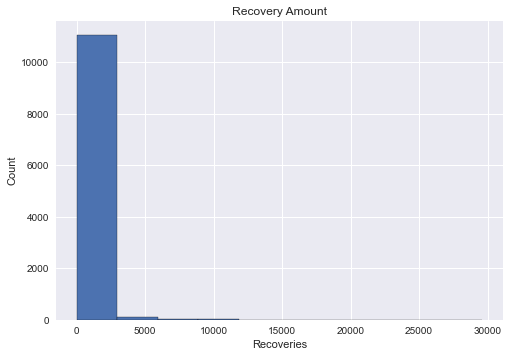

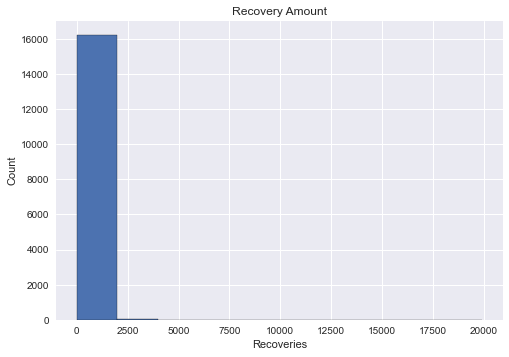

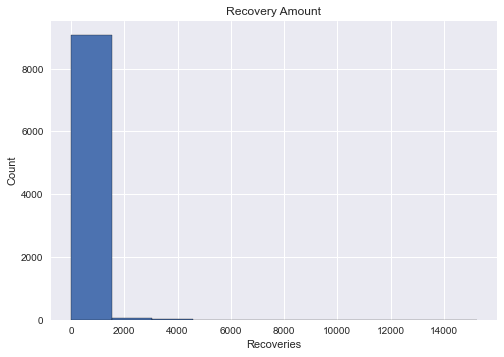

In [98]:
def recovery_plotter(li):
    for i in li:
        fig, ax = plt.subplots()
        ax.hist(i['recoveries'], 10, edgecolor='black')
        ax.set_title("Recovery Amount")
        ax.set_xlabel("Recoveries")
        ax.set_ylabel("Count")
        plt.show()
recovery_plotter(li)

**Observations:**
Recovery amounts is maximum in the range of 0-2500 across all the lines of verification status. It is not much useful for our analysis. 

### Multivarivate Analysis

In [99]:
corr = round(loan.corr(),2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.00,0.98,0.94,0.29,0.93,0.40,0.09,-0.04,0.00,0.17,-0.04,0.31,0.07,0.24,0.88,0.84,0.84,0.73,0.04,0.15,0.08,0.47,-0.03
funded_amnt,0.98,1.00,0.95,0.30,0.96,0.40,0.09,-0.04,0.00,0.16,-0.04,0.31,0.07,0.23,0.89,0.86,0.86,0.74,0.04,0.15,0.08,0.47,-0.03
funded_amnt_inv,0.94,0.95,1.00,0.29,0.90,0.38,0.10,-0.04,-0.01,0.15,-0.05,0.29,0.08,0.23,0.87,0.90,0.83,0.72,0.02,0.13,0.06,0.47,-0.04
int_rate,0.29,0.30,0.29,1.00,0.27,0.05,0.11,0.16,0.13,-0.01,0.10,0.08,0.47,-0.06,0.28,0.27,0.16,0.52,0.09,0.13,0.07,0.17,0.09
installment,0.93,0.96,0.90,0.27,1.00,0.40,0.08,-0.02,0.00,0.16,-0.04,0.31,0.10,0.21,0.85,0.81,0.84,0.64,0.05,0.12,0.08,0.41,-0.03
annual_inc,0.40,0.40,0.38,0.05,0.40,1.00,-0.07,0.03,0.03,0.27,-0.01,0.40,0.05,0.39,0.38,0.37,0.38,0.27,0.00,0.04,0.02,0.22,-0.01
dti,0.09,0.09,0.10,0.11,0.08,-0.07,1.00,-0.03,0.01,0.30,-0.01,0.27,0.28,0.25,0.09,0.09,0.06,0.12,-0.01,0.03,0.01,0.03,0.00
delinq_2yrs,-0.04,-0.04,-0.04,0.16,-0.02,0.03,-0.03,1.00,0.01,0.01,0.01,-0.06,-0.04,0.07,-0.03,-0.04,-0.04,0.02,0.03,0.01,0.01,-0.01,0.00
inq_last_6mths,0.00,0.00,-0.01,0.13,0.00,0.03,0.01,0.01,1.00,0.09,0.03,-0.03,-0.07,0.11,-0.02,-0.03,-0.03,0.02,0.03,0.02,0.01,0.02,0.02
open_acc,0.17,0.16,0.15,-0.01,0.16,0.27,0.30,0.01,0.09,1.00,0.01,0.29,-0.10,0.68,0.15,0.14,0.15,0.11,-0.02,0.02,0.00,0.08,0.01


**Observations**
* Here we can see, the range of numbers 0.1-1 , that means the corresponding columns has positive correlation that is, if the value of one increases, others also increases and vice-versa
* example: loan_amnt & funded_amnt, loan_amnt & total_pymnt.
* On the other hand the range of numbers -0.1 to -1 are negatively correlated, that means if the value of one variable increases other decreases.
* example: annual_inc & dti

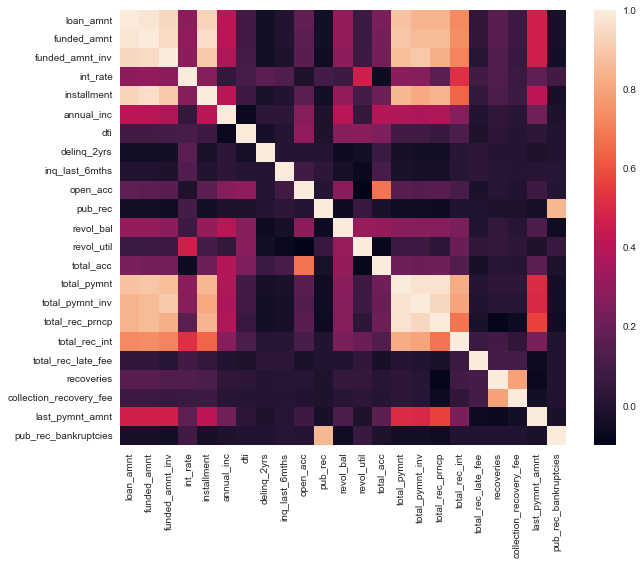

In [100]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

**Observations**

* The light coloured blocks has higher postive correlation while the dark purple has high negative correlation 
